# Import Libraries

In [790]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install -U scikit-learn
!pip install xgboost
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [791]:
qsar_df = pd.read_csv("D:\Downloads\qsar+fish+toxicity\qsar_fish_toxicity.csv")

# Copy of Dataset

In [792]:
df = qsar_df.copy()

In [793]:
df.head()

,cic0
0,3.26;0.829;1.676;0;1;1.453;3.770
1,2.189;0.58;0.863;0;0;1.348;3.115
2,2.125;0.638;0.831;0;0;1.348;3.531
3,3.027;0.331;1.472;1;0;1.807;3.510
4,2.094;0.827;0.86;0;0;1.886;5.390


# Creating Columns by splitting

In [675]:
# df['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP','LC50'] = df['cic0'].str.split(';', expand=True)


In [794]:
# Split the 'cic0' column and expand it into separate columns
split_columns = df['cic0'].str.split(';', expand=True)

# Assign the split columns to separate columns in the DataFrame
df['CIC0'] = split_columns[0]
df['SM1_Dz(Z)'] = split_columns[1]
df['GATS1i'] = split_columns[2]
df['NdsCH'] = split_columns[3]
df['NdssC'] = split_columns[4]
df['MLOGP'] = split_columns[5]
df['LC50'] = split_columns[6]


In [795]:
df.head()

,cic0,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.26;0.829;1.676;0;1;1.453;3.770,3.26,0.829,1.676,0,1,1.453,3.770
1,2.189;0.58;0.863;0;0;1.348;3.115,2.189,0.58,0.863,0,0,1.348,3.115
2,2.125;0.638;0.831;0;0;1.348;3.531,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027;0.331;1.472;1;0;1.807;3.510,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094;0.827;0.86;0;0;1.886;5.390,2.094,0.827,0.86,0,0,1.886,5.390


In [796]:
df.drop(['cic0'], axis=1, inplace=True)


# Shape of Dataset

In [797]:
df.shape

(908, 7)

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CIC0       908 non-null    object
 1   SM1_Dz(Z)  908 non-null    object
 2   GATS1i     908 non-null    object
 3   NdsCH      908 non-null    object
 4   NdssC      908 non-null    object
 5   MLOGP      908 non-null    object
 6   LC50       908 non-null    object
dtypes: object(7)
memory usage: 49.8+ KB


# Statistical Description

In [799]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908,908,908,908,908,908,908
unique,502,186,557,5,7,559,827
top,2.126,0.223,0.941,0,0,0.8,3.513
freq,14,135,8,760,622,10,4


# Duplicate values

In [800]:
df.duplicated().sum()

1

In [801]:
df.value_counts().sum()

908

# Number of unique values in the dataset

In [802]:
df.nunique().sum()

2643

# Null values in each column

In [803]:
df.isnull().sum()

CIC0         0
SM1_Dz(Z)    0
GATS1i       0
NdsCH        0
NdssC        0
MLOGP        0
LC50         0
dtype: int64

In [804]:
df.columns

Index(['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50'], dtype='object')

# Value counts and number of unique vaulues in each column

In [805]:
df['CIC0'].nunique()

502

In [806]:
df['CIC0'].value_counts()

CIC0
2.126    14
3.08     11
2.377     9
2.479     7
2.508     7
         ..
3.055     1
2.417     1
3.128     1
4.395     1
4.057     1
Name: count, Length: 502, dtype: int64

 Higher frequencies for certain CIC0 values suggest that those particular characteristics are more common among the chemicals being analyzed

In [807]:
df['SM1_Dz(Z)'].nunique()

186

In [808]:
df['SM1_Dz(Z)'].value_counts()

SM1_Dz(Z)
0.223    135
0.134     74
0.405     69
0.331     39
0         36
        ... 
1.477      1
1.214      1
1.327      1
1.371      1
1.032      1
Name: count, Length: 186, dtype: int64

In [809]:
df['GATS1i'].nunique()

557

In [810]:
df['GATS1i'].value_counts()

GATS1i
0.941    8
1.179    7
0.871    7
0.954    7
0.938    7
        ..
1.7      1
1.563    1
1.481    1
2.095    1
1.183    1
Name: count, Length: 557, dtype: int64

Higher frequencies suggest that certain patterns in the 2D autocorrelations, as represented by specific GATS1i values, are more common among the molecules being analyzed.

In [811]:
df['NdssC'].nunique()

7

In [812]:
df['NdssC'].value_counts()

NdssC
0    622
1    176
2     81
3     18
4      8
6      2
5      1
Name: count, dtype: int64

0: There are 622 instances where there are no types of atoms present in the chemical.

1: There are 176 instances where there is one type of atom present.
    
2: There are 81 instances where there are two types of atoms present.

3: There are 18 instances where there are three types of atoms present.

4: There are 8 instances where there are four types of atoms present.

6: There are 2 instances where there are six types of atoms present.

5: There is 1 instance where there are five types of atoms present.

In [813]:
df['NdsCH'].nunique()

5

In [814]:
df['NdsCH'].value_counts()

NdsCH
0    760
1    107
2     29
4      7
3      5
Name: count, dtype: int64

"0" indicates there are 760 instances where there are no atoms of this type present.

"1" indicates there are 107 instances where there is one atom of this type present.

"2" indicates there are 29 instances where there are two atoms of this type present.

"3" indicates there are 5 instances where there are three atoms of this type present.

"4" indicates there are 7 instances where there are four atoms of this type present.

In [815]:
df['MLOGP'].nunique()

559

In [816]:
df['MLOGP'].value_counts()

MLOGP
0.8      10
1.701    10
2.604     9
0.202     9
1.748     9
         ..
3.225     1
2.031     1
2.297     1
1.437     1
4.754     1
Name: count, Length: 559, dtype: int64

Higher frequencies for certain MLOGP values suggest that those particular molecular properties are more common among the chemicals being analyzed.

In [817]:
df['LC50'].nunique()

827

In [818]:
df['LC50'].value_counts()

LC50
3.513    4
4.208    4
3.979    3
3.926    3
3.660    3
        ..
4.342    1
7.691    1
4.727    1
5.510    1
8.201    1
Name: count, Length: 827, dtype: int64

Higher frequencies suggest that certain structural arrangements, as represented by specific SM1_Dz(Z) values, are more common among the molecules being analyzed.

# Changing data types of each column

In [819]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(np.float32)

# Data Wrangling

In [820]:
# Find the highest toxicity level for each MLOGP value
highest_toxicity_per_MLOGP = df.groupby('MLOGP')['LC50'].max()

# Find the MLOGP value with the highest toxicity level
highest_toxicity_MLOGP = highest_toxicity_per_MLOGP.nlargest(3)

print(highest_toxicity_per_MLOGP)
print("MLOGP value with the highest toxicity level:")
print(highest_toxicity_MLOGP)

MLOGP
-2.884    2.375
-2.089    0.600
-2.030    3.638
-1.960    3.396
-1.358    3.689
          ...  
 5.741    5.758
 5.934    4.862
 6.166    7.429
 6.203    4.628
 6.515    3.623
Name: LC50, Length: 559, dtype: float32
MLOGP value with the highest toxicity level:
MLOGP
2.749    9.612
4.246    9.354
4.832    8.916
Name: LC50, dtype: float32


In [821]:
# Find the highest toxicity level for each CIC0 value
highest_toxicity_per_CIC0 = df.groupby('CIC0')['LC50'].max()

# Find the CIC0 value with the highest toxicity level
highest_toxicity_CIC0 = highest_toxicity_per_CIC0.nlargest(3)

print(highest_toxicity_per_CIC0)
print("CIC0 value with the highest toxicity level:")
print(highest_toxicity_CIC0)

CIC0
0.667    5.558
0.965    4.370
0.973    2.725
1.000    3.499
1.075    5.386
         ...  
4.810    2.548
4.829    6.347
4.880    4.770
5.158    6.040
5.926    4.628
Name: LC50, Length: 502, dtype: float32
CIC0 value with the highest toxicity level:
CIC0
4.785    9.612
4.219    9.354
4.211    8.916
Name: LC50, dtype: float32


.

In [822]:
# Find the highest toxicity level for each GATS1i value
highest_toxicity_per_GATS1i = df.groupby('GATS1i')['LC50'].max()
print(highest_toxicity_per_GATS1i)

# Find the GATS1i value with the highest toxicity level
highest_toxicity_GATS1i = highest_toxicity_per_GATS1i.nlargest(3)

print("GATS1i value with the highest toxicity level:")
print(highest_toxicity_GATS1i)

GATS1i
0.396    6.720
0.421    5.591
0.523    4.737
0.595    4.705
0.618    6.254
         ...  
2.606    1.037
2.609    1.301
2.672    0.841
2.698    0.450
2.920    2.375
Name: LC50, Length: 557, dtype: float32
GATS1i value with the highest toxicity level:
GATS1i
1.471    9.612
0.963    9.354
1.045    8.916
Name: LC50, dtype: float32


In [823]:
highest_toxicity_per_NdssC = df.groupby('NdssC')['LC50'].max()

# Find the NdssC value with the highest toxicity level
highest_toxicity_NdssC = highest_toxicity_per_NdssC.nlargest(3)

print(highest_toxicity_per_NdssC)
print("NdssC value with the highest toxicity level:")
print(highest_toxicity_NdssC)

NdssC
0.0    8.132
1.0    9.354
2.0    8.604
3.0    8.201
4.0    9.612
5.0    6.683
6.0    6.254
Name: LC50, dtype: float32
NdssC value with the highest toxicity level:
NdssC
4.0    9.612
1.0    9.354
2.0    8.604
Name: LC50, dtype: float32


In [824]:
# Find the highest toxicity level for each NdsCH value
highest_toxicity_per_NdsCH = df.groupby('NdsCH')['LC50'].max()

# Find the NdsCH value with the highest toxicity level
highest_toxicity_NdsCH = highest_toxicity_per_NdsCH.nlargest(3)

print(highest_toxicity_per_NdsCH)
print("NdsCH value with the highest toxicity level:")
print(highest_toxicity_NdsCH)

NdsCH
0.0    9.354
1.0    9.612
2.0    7.382
3.0    5.192
4.0    6.923
Name: LC50, dtype: float32
NdsCH value with the highest toxicity level:
NdsCH
1.0    9.612
0.0    9.354
2.0    7.382
Name: LC50, dtype: float32


In [825]:
highest_toxicity_per_SM1_Dz = df.groupby('SM1_Dz(Z)')['LC50'].max()

# Find the NdssC value with the highest toxicity level
highest_toxicity_SM1_Dz = highest_toxicity_per_SM1_Dz.nlargest(3)

print(highest_toxicity_per_SM1_Dz)
print("SM1_Dz(Z) value with the highest toxicity level:")
print(highest_toxicity_SM1_Dz)

SM1_Dz(Z)
0.000    7.346
0.134    7.809
0.223    6.644
0.251    6.483
0.288    3.753
         ...  
1.834    8.471
1.860    8.207
2.044    6.113
2.071    6.446
2.171    3.623
Name: LC50, Length: 186, dtype: float32
SM1_Dz(Z) value with the highest toxicity level:
SM1_Dz(Z)
1.263    9.612
1.033    9.354
0.932    8.916
Name: LC50, dtype: float32


# EDA

# Distribution plot of each numerical column

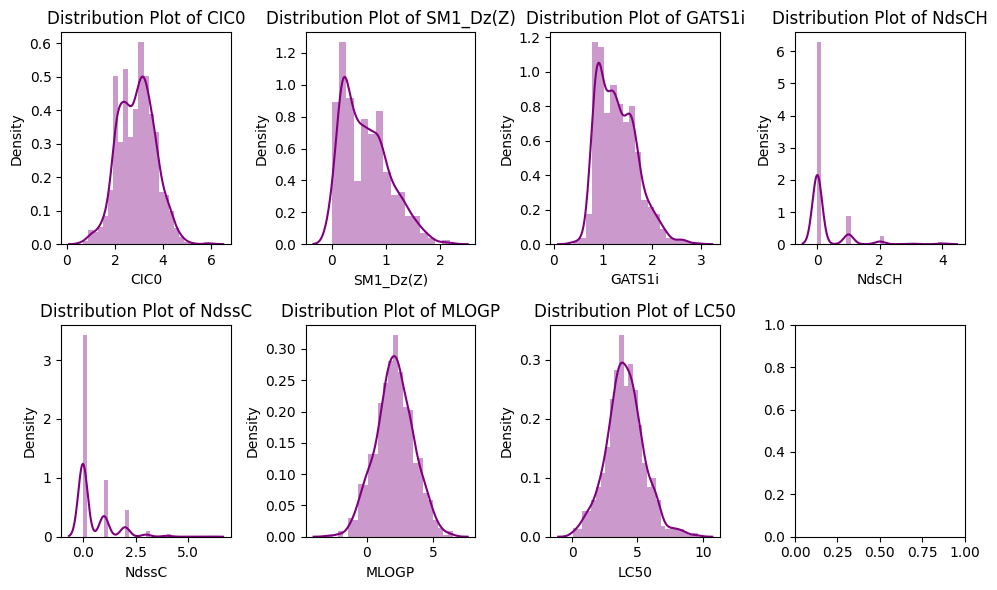

In [826]:
# Define the number of rows and columns for subplots
n_rows = 2
n_cols = 4

# Plot distribution plots for specified rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column and plot distribution plot
for i, column in enumerate(df.columns):
    if i < n_rows * n_cols:
        sns.distplot(df[column], ax=axes[i], color='purple')
        axes[i].set_title(f'Distribution Plot of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
    else:
        break

plt.tight_layout()
plt.show()




# Regression plot of each column

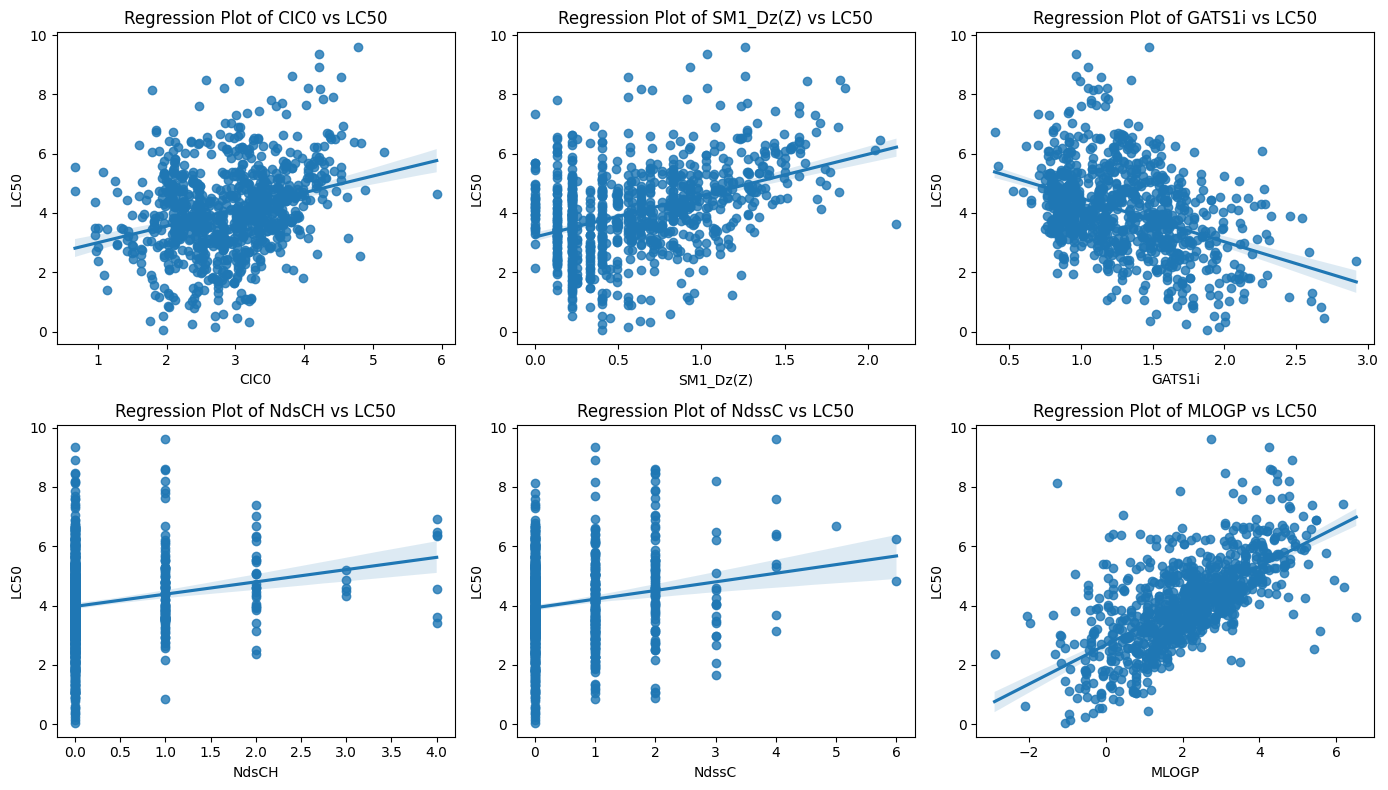

In [827]:
target_column = "LC50"
feature_columns = [col for col in df.columns if col != target_column]

# Calculate the number of rows and columns for subplo
n_rows = 2
n_cols = 3
    
# Plot regression plots for each feature column against the target column
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
  
# Flatten the axes array for easier iteration
axes = axes.flatten()
    
for i, column in enumerate(feature_columns):
    sns.regplot(x=df[column], y=df[target_column], ax=axes[i])
    axes[i].set_title(f'Regression Plot of {column} vs {target_column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel(target_column)

plt.tight_layout()
plt.show()

All the features are positively related with LC50 column except GATS1i coumn which is negatively related to LC50

# Heatmap

<Axes: >

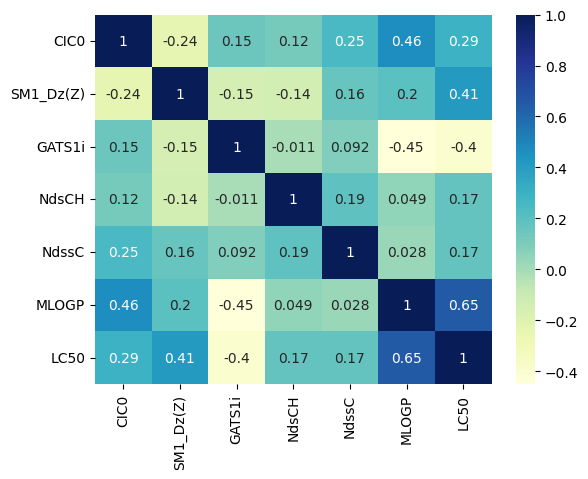

In [828]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

MLOGP and LC 50 are moderatey correlated 

# Pair plot

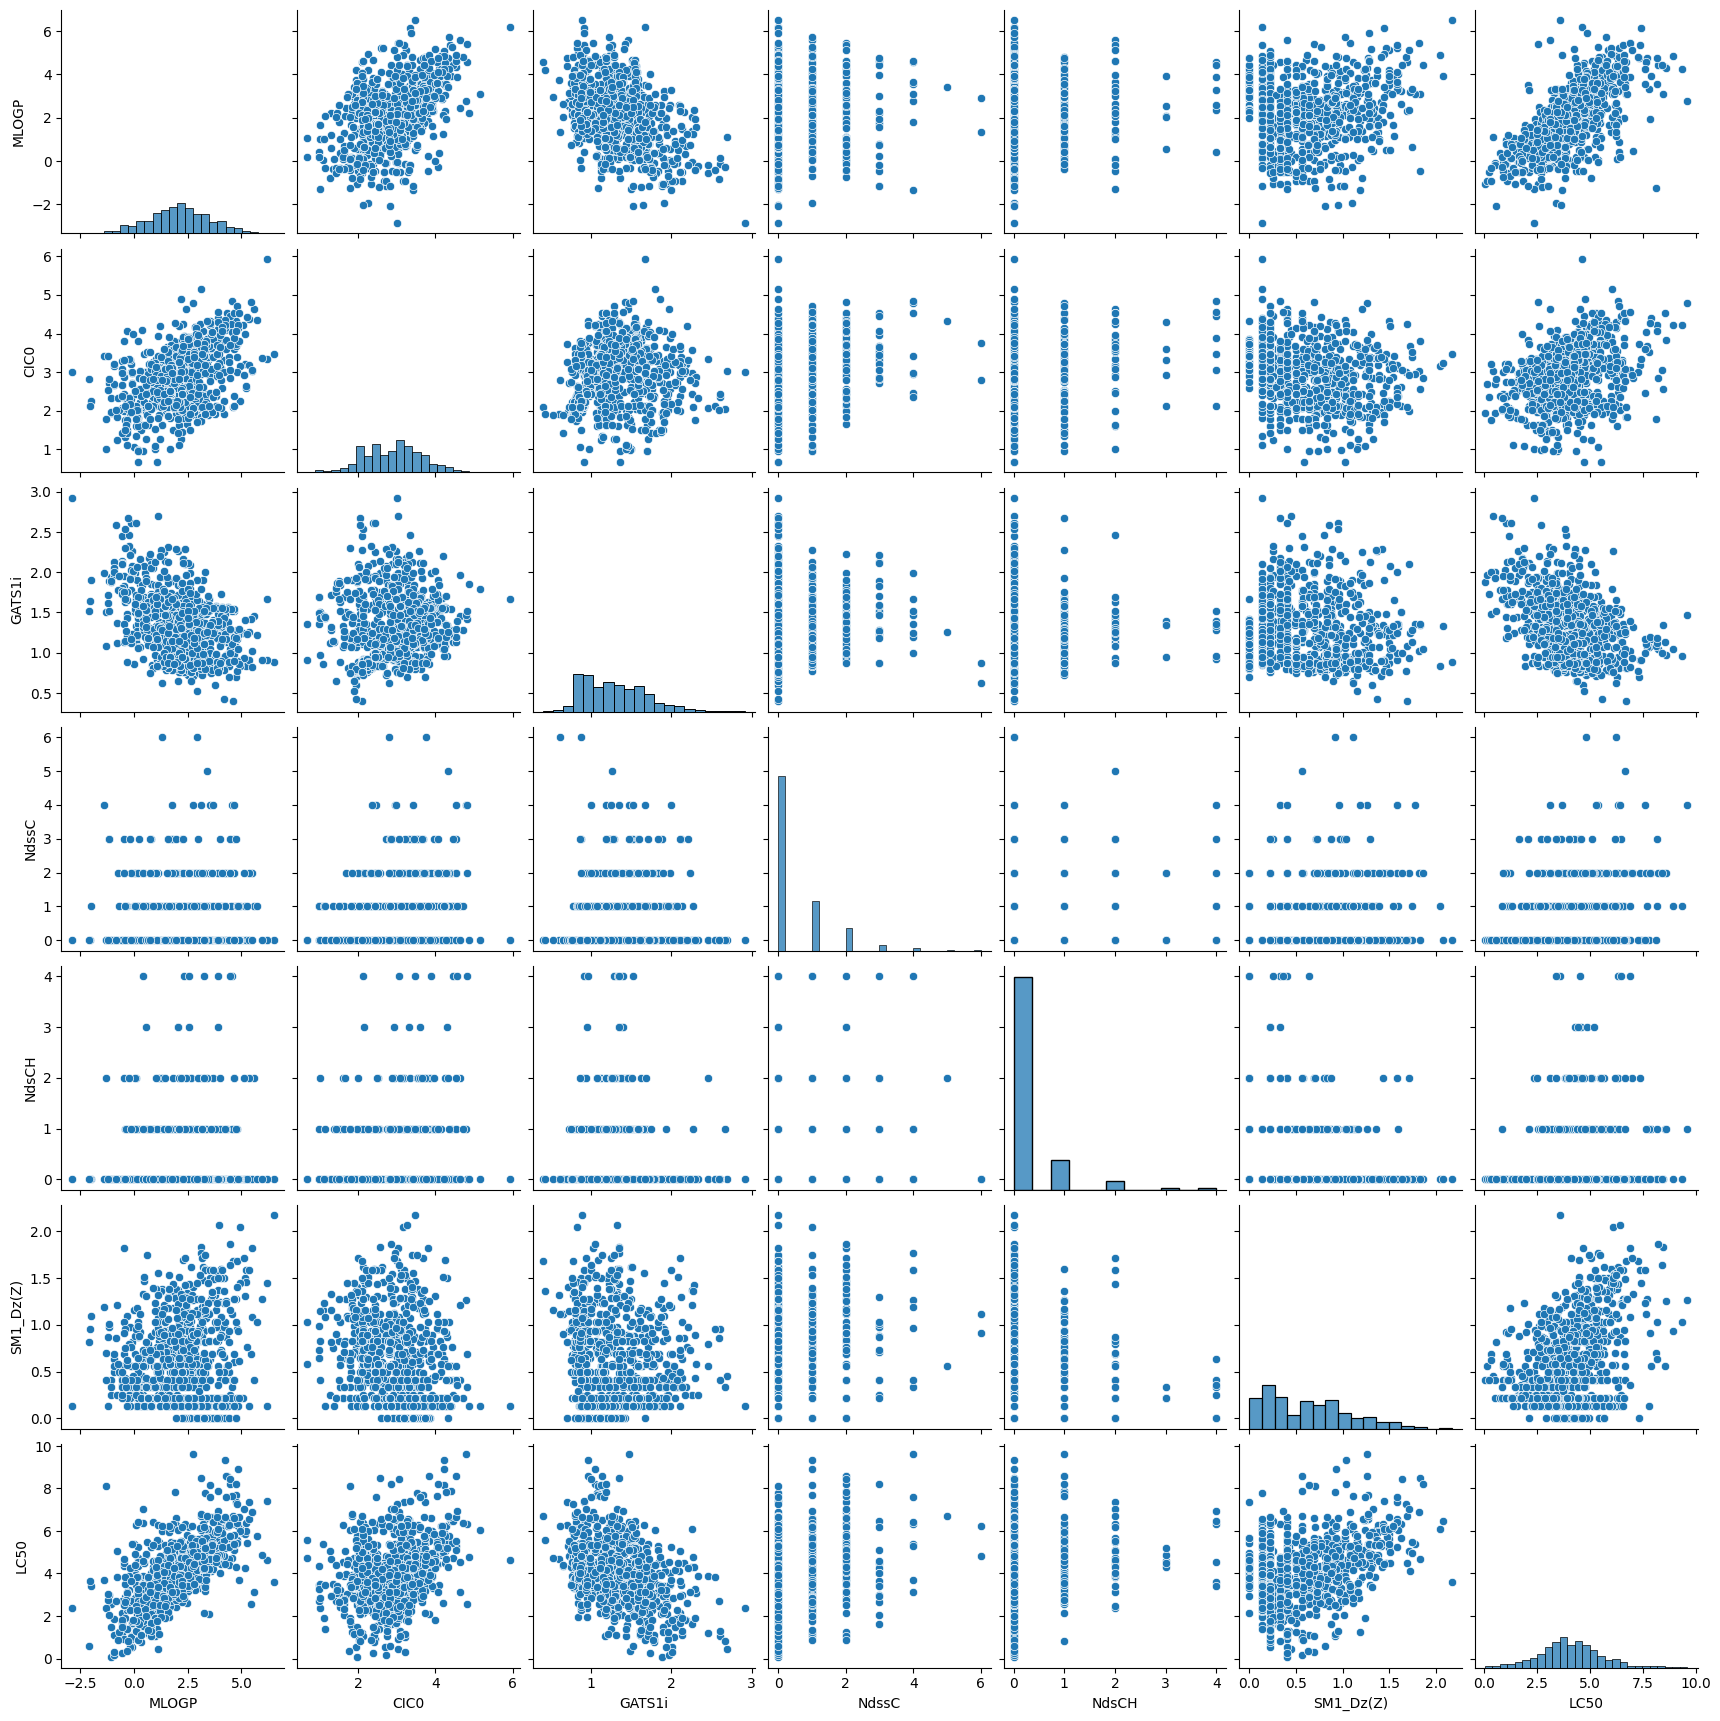

In [829]:
# Pair plot
sns.pairplot(df, vars=['MLOGP', 'CIC0', 'GATS1i', 'NdssC', 'NdsCH', 'SM1_Dz(Z)', 'LC50'])
plt.show()

# Scaling using MinMax Scaler

In [830]:
# Define the pipeline
scale_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Fit and transform the data using the pipeline
scaled_data = scale_pipeline.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_scaled_columns = pd.DataFrame(scaled_data, columns=df.columns)
print(df_scaled_columns)


         CIC0  SM1_Dz(Z)    GATS1i  NdsCH     NdssC     MLOGP      LC50
0    0.493059   0.381852  0.507132   0.00  0.166667  0.461432  0.388848
1    0.289409   0.267158  0.185024   0.00  0.000000  0.450261  0.320326
2    0.277239   0.293874  0.172345   0.00  0.000000  0.450261  0.363846
3    0.448754   0.152464  0.426307   0.25  0.000000  0.499096  0.361649
4    0.271344   0.380930  0.183835   0.00  0.000000  0.507501  0.558322
..        ...        ...       ...    ...       ...       ...       ...
903  0.405781   0.335329  0.725040   0.00  0.333333  0.385147  0.319699
904  0.567598   0.401658  0.186609   0.50  0.500000  0.730610  0.417094
905  0.588705   0.421925  0.190967   0.00  1.000000  0.617300  0.498483
906  0.411485   0.641640  0.269810   0.00  0.166667  0.403234  0.550685
907  0.644609   0.475357  0.311807   0.25  0.500000  0.812640  0.852390

[908 rows x 7 columns]


# Train Test splitting

In [831]:
X=df.iloc[:,:-1].values
y=df.iloc[:,6].values

In [832]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [833]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (726, 6)
Test set shape: (182, 6)


# Mode1: KNN Regressor

In [834]:
knnr_pipeline = Pipeline([
        ('knn', KNeighborsRegressor(n_neighbors=5))
])

In [835]:
# Perform cross-validation
knnr_cv_scores = cross_val_score(knnr_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
   
# Convert the negative MSE scores to positive RMSE scores
knnr_cv_rmse_scores = np.sqrt(-knnr_cv_scores)
    
# Calculate the mean and standard deviation of the RMSE scores
knnr_mean_cv_rmse = np.mean(knnr_cv_rmse_scores)
knnr_std_cv_rmse = np.std(knnr_cv_rmse_scores)

# Print the cross-validation results
print("Cross-validation RMSE scores:", knnr_cv_rmse_scores)
print("Mean RMSE:", knnr_mean_cv_rmse)
print("Standard deviation of RMSE:", knnr_std_cv_rmse)

Cross-validation RMSE scores: [0.87611383 1.0664447  0.88168624 0.90137208 0.8971502 ]
Mean RMSE: 0.9245534106443836
Standard deviation of RMSE: 0.07156177235953357


In [836]:
# Fit the model
knnr_pipeline.fit(X_train,y_train)

# Predict the result
knnr_y_train_pred = knnr_pipeline.predict(X_train)
knnr_y_test_pred = knnr_pipeline.predict(X_test)

In [837]:
# Calculating metrics for training data
knnr_mae_train = mean_absolute_error(y_train, knnr_y_train_pred)
knnr_mse_train = mean_squared_error(y_train, knnr_y_train_pred)
knnr_rmse_train = np.sqrt(knnr_mse_train)
knnr_r2_train = r2_score(y_train, knnr_y_train_pred)

# Calculating metrics for testing data
knnr_mae_test = mean_absolute_error(y_test, knnr_y_test_pred)
knnr_mse_test = mean_squared_error(y_test, knnr_y_test_pred)
knnr_rmse_test = np.sqrt(knnr_mse_test)
knnr_r2_test = r2_score(y_test,knnr_y_test_pred)

In [838]:
print("Training set metrics:")
print(f"MAE:{knnr_mae_train}")
print(f"MSE:{knnr_mse_train}")
print(f"RMSE:{knnr_rmse_train}")
print(f"R squared:{knnr_r2_train}")

Training set metrics:
MAE:0.5248520970344543
MSE:0.554091215133667
RMSE:0.7443730235099792
R squared:0.7284958578788344


In [839]:
print("Test set metrics:")
print(f"MAE:{knnr_mae_test}")
print(f"MSE:{knnr_mse_test}")
print(f"RMSE:{knnr_rmse_test}")
print(f"R squared:{knnr_r2_test}")

Test set metrics:
MAE:0.6998351812362671
MSE:0.9743479490280151
RMSE:0.9870906472206116
R squared:0.5972896473985061


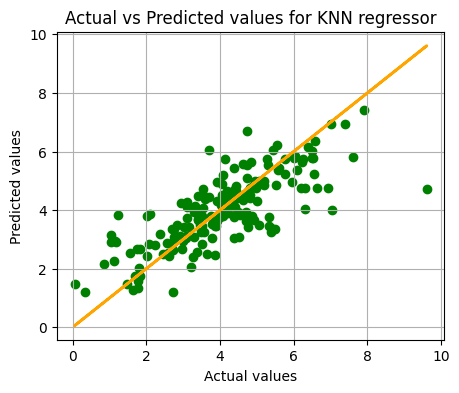

In [840]:
# Plot for Actual vs Predicted values
plt.figure(figsize=(5,4))
plt.scatter(y_test, knnr_y_test_pred, color='green')
plt.plot(y_test, y_test, color='orange', linewidth = 2)
plt.title ('Actual vs Predicted values for KNN regressor')
plt.xlabel('Actual values') 
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

In [841]:
from sklearn.model_selection import cross_val_score, KFold

# Mode2: DecisionTree Regressor

In [842]:
dtr_pipeline = Pipeline([
        ('dt', DecisionTreeRegressor(random_state=42))
])  

In [843]:
# Perform cross-validation
dtr_cv_scores = cross_val_score(dtr_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
   
# Convert the negative MSE scores to positive RMSE scores
dtr_cv_rmse_scores = np.sqrt(-dtr_cv_scores)
    
# Calculate the mean and standard deviation of the RMSE scores
dtr_mean_cv_rmse = np.mean(dtr_cv_rmse_scores)
dtr_std_cv_rmse = np.std(dtr_cv_rmse_scores)

# Print the cross-validation results
print("Cross-validation RMSE scores:", dtr_cv_rmse_scores)
print("Mean RMSE:", dtr_mean_cv_rmse)
print("Standard deviation of RMSE:", dtr_std_cv_rmse)

Cross-validation RMSE scores: [1.06925553 1.20355158 1.14637121 1.23303821 1.17165537]
Mean RMSE: 1.164774381798243
Standard deviation of RMSE: 0.05598838657073098


In [844]:
# Fit the model
dtr_pipeline.fit(X_train,y_train)

# Predict the result
dtr_y_train_pred = dtr_pipeline.predict(X_train)
dtr_y_test_pred = dtr_pipeline.predict(X_test)

In [845]:
# Calculating metrics for training dataset
dtr_mae_train = mean_absolute_error(y_train, dtr_y_train_pred)
dtr_mse_train = mean_squared_error(y_train, dtr_y_train_pred)
dtr_rmse_train = np.sqrt(dtr_mse_train)
dtr_r2_train = r2_score(y_train, dtr_y_train_pred)

# Calculating metrics for testing dataset
dtr_mae_test = mean_absolute_error(y_test, dtr_y_test_pred)
dtr_mse_test = mean_squared_error(y_test, dtr_y_test_pred)
dtr_rmse_test = np.sqrt(dtr_mse_test)
dtr_r2_test = r2_score(y_test, dtr_y_test_pred)

In [846]:
print("Training set metrics:")
print(f"MAE:{dtr_mae_train}")
print(f"MSE:{dtr_mse_train}")
print(f"RMSE:{dtr_rmse_train}")
print(f"R squared:{dtr_r2_train}")

Training set metrics:
MAE:0.046562048412442096
MSE:0.017858984055946017
RMSE:0.13363750991374396
R squared:0.9912491153476161


In [847]:
print("Test set metrics:")
print(f"MAE:{dtr_mae_test}")
print(f"MSE:{dtr_mse_test}")
print(f"RMSE:{dtr_rmse_test}")
print(f"R squared:{dtr_r2_test}")

Test set metrics:
MAE:0.9149056887765835
MSE:1.804456124112197
RMSE:1.3433004593582916
R squared:0.2541954920165571


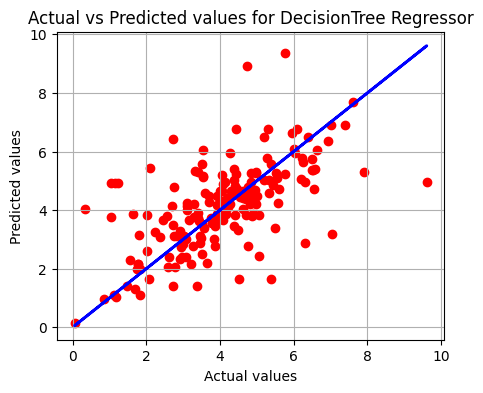

In [848]:
# Plot for Actual vs Predicted values 
plt.figure(figsize=(5,4))
plt.scatter(y_test, dtr_y_test_pred, color='red')
plt.plot(y_test, y_test, color='blue', linewidth = 2)
plt.title ('Actual vs Predicted values for DecisionTree Regressor')
plt.xlabel('Actual values') 
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

# Mode3: RandomForest Regressor

In [849]:
rfr_pipeline = Pipeline([
      ('rf', RandomForestRegressor(max_depth=4, random_state=42))
])

In [850]:
# Perform cross-validation
rfr_cv_scores = cross_val_score(rfr_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
   
# Convert the negative MSE scores to positive RMSE scores
rfr_cv_rmse_scores = np.sqrt(-rfr_cv_scores)
    
# Calculate the mean and standard deviation of the RMSE scores
rfr_mean_cv_rmse = np.mean(rfr_cv_rmse_scores)
rfr_std_cv_rmse = np.std(rfr_cv_rmse_scores)

# Print the cross-validation results
print("Cross-validation RMSE scores:", rfr_cv_rmse_scores)
print("Mean RMSE:", rfr_mean_cv_rmse)
print("Standard deviation of RMSE:", rfr_std_cv_rmse) 

Cross-validation RMSE scores: [0.90392871 1.04422574 0.91733196 0.89614336 0.88295661]
Mean RMSE: 0.9289172742052901
Standard deviation of RMSE: 0.05872172089069969


In [851]:
# Fit the model
rfr_pipeline.fit(X_train,y_train)

# Predict the result
rfr_y_train_pred = rfr_pipeline.predict(X_train)
rfr_y_test_pred = rfr_pipeline.predict(X_test)

In [852]:
# Calculating the metrics for training dataset
rfr_mae_train = mean_absolute_error(y_train, rfr_y_train_pred)
rfr_mse_train = mean_squared_error(y_train, rfr_y_train_pred)
rfr_rmse_train = np.sqrt(rfr_mse_train)
rfr_r2_train = r2_score(y_train, rfr_y_train_pred)

# Calculating the metrics for testing dataset
rfr_mae_test = mean_absolute_error(y_test, rfr_y_test_pred)
rfr_mse_test = mean_squared_error(y_test, rfr_y_test_pred)
rfr_rmse_test = np.sqrt(rfr_mse_test)
rfr_r2_test = r2_score(y_test, rfr_y_test_pred)

In [853]:
print("Training set metrics:")
print(f"MAE:{rfr_mae_train}")
print(f"MSE:{rfr_mse_train}")
print(f"RMSE:{rfr_rmse_train}")
print(f"R squared:{rfr_r2_train}")

Training set metrics:
MAE:0.6000483508061208
MSE:0.6400999050245957
RMSE:0.8000624382037915
R squared:0.6863516750267121


In [854]:
print("Test set metrics:")
print(f"MAE:{rfr_mae_test}")
print(f"MSE:{rfr_mse_test}")
print(f"RMSE:{rfr_rmse_test}")
print(f"R squared:{rfr_r2_test}")

Test set metrics:
MAE:0.7584859423336147
MSE:1.0800298870684046
RMSE:1.0392448638643372
R squared:0.5536100059352946


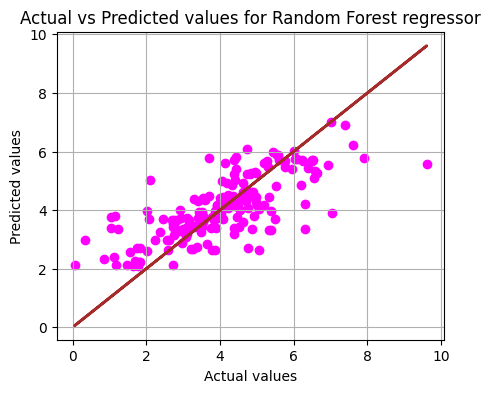

In [855]:
# Plot for Actual vs Predicted values
plt.figure(figsize=(5,4))
plt.scatter(y_test, rfr_y_test_pred, color='magenta')
plt.plot(y_test, y_test, color='brown', linewidth = 2)
plt.title ('Actual vs Predicted values for Random Forest regressor')
plt.xlabel('Actual values') 
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

# ModeL4: SVR 

In [856]:
# SVR Pipeline
svr_pipeline = Pipeline([
    ('svr', SVR(kernel='linear'))
])

In [857]:
# Perform cross-validation
svr_cv_scores = cross_val_score(svr_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
svr_cv_rmse_scores = np.sqrt(-svr_cv_scores)

# Calculate the mean and standard deviation of the RMSE scores
svr_mean_cv_rmse = np.mean(svr_cv_rmse_scores)
svr_std_cv_rmse = np.std(svr_cv_rmse_scores)

# Print the cross-validation results
print("Cross-validation RMSE scores:", svr_cv_rmse_scores)
print("Mean RMSE:", svr_mean_cv_rmse)
print("Standard deviation of RMSE:", svr_std_cv_rmse)

Cross-validation RMSE scores: [0.84793331 1.1261837  0.88732822 0.91547314 0.93232246]
Mean RMSE: 0.94184816576907
Standard deviation of RMSE: 0.0964970423890041


In [858]:
# Fit the SVR model
svr_pipeline.fit(X_train, y_train)

# Evaluate SVR model
svr_y_train_pred = svr_pipeline.predict(X_train)
svr_y_test_pred = svr_pipeline.predict(X_test)

In [859]:
# Calculate metrics
svr_mae_train = mean_absolute_error(y_train, svr_y_train_pred)
svr_mse_train = mean_squared_error(y_train, svr_y_train_pred)
svr_rmse_train = np.sqrt(svr_mse_train)
svr_r2_train = r2_score(y_train, svr_y_train_pred)

svr_mae_test = mean_absolute_error(y_test, svr_y_test_pred)
svr_mse_test = mean_squared_error(y_test, svr_y_test_pred)
svr_rmse_test = np.sqrt(svr_mse_test)
svr_r2_test = r2_score(y_test, svr_y_test_pred)

In [886]:
# Print SVR metrics
print("SVR Training set metrics:")
print(f"MAE: {svr_mae_train}")
print(f"MSE: {svr_mse_train}")
print(f"RMSE: {svr_rmse_train}")
print(f"R squared: {svr_r2_train}")

SVR Training set metrics:
MAE: 0.6688772278825825
MSE: 0.8717859155776064
RMSE: 0.9336947657439268
R squared: 0.5728257573390613


In [887]:
print("SVR Test set metrics:")
print(f"MAE: {svr_mae_test}")
print(f"MSE: {svr_mse_test}")
print(f"RMSE: {svr_rmse_test}")
print(f"R squared: {svr_r2_test}")

SVR Test set metrics:
MAE: 0.7375734436545455
MSE: 1.0870032494672541
RMSE: 1.042594479875687
R squared: 0.5507278271760727


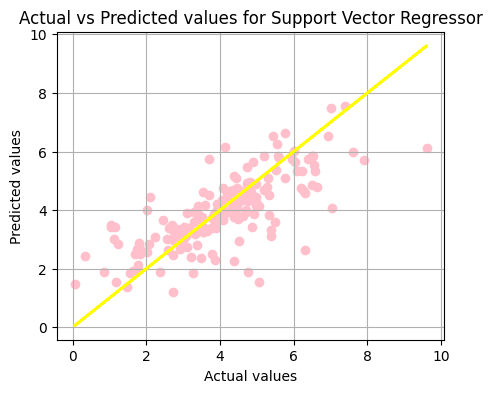

In [888]:
# Plot for Actual vs Predicted values 
plt.figure(figsize=(5,4))
plt.scatter(y_test, svr_y_test_pred, color='pink')
plt.plot(y_test, y_test, color='yellow', linewidth = 2)
plt.title ('Actual vs Predicted values for Support Vector Regressor')
plt.xlabel('Actual values') 
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

# Model5:XGBoost Regressor

In [889]:
# XGBoost Regressor
xgb_pipeline = Pipeline([
    ('xgb', XGBRegressor())
])

In [890]:
# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
xgb_cv_rmse_scores = np.sqrt(-xgb_cv_scores)

# Calculate the mean and standard deviation of the RMSE scores
xgb_mean_cv_rmse = np.mean(xgb_cv_rmse_scores)
xgb_std_cv_rmse = np.std(xgb_cv_rmse_scores)

# Print the cross-validation results
print("Cross-validation RMSE scores:", xgb_cv_rmse_scores)
print("Mean RMSE:", xgb_mean_cv_rmse)
print("Standard deviation of RMSE:", xgb_std_cv_rmse)

Cross-validation RMSE scores: [0.87669165 0.97545977 0.83969495 0.92071771 0.87797259]
Mean RMSE: 0.8981073325000878
Standard deviation of RMSE: 0.04641265815400413


In [891]:
# Fit the XGBoost model
xgb_pipeline.fit(X_train, y_train)

# Predict XGBoost model
xgb_y_train_pred = xgb_pipeline.predict(X_train)
xgb_y_test_pred = xgb_pipeline.predict(X_test)

In [892]:
# Calculate metrics
xgb_mae_train = mean_absolute_error(y_train, xgb_y_train_pred)
xgb_mse_train = mean_squared_error(y_train, xgb_y_train_pred)
xgb_rmse_train = np.sqrt(xgb_mse_train)
xgb_r2_train = r2_score(y_train, xgb_y_train_pred)

xgb_mae_test = mean_absolute_error(y_test, xgb_y_test_pred)
xgb_mse_test = mean_squared_error(y_test, xgb_y_test_pred)
xgb_rmse_test = np.sqrt(xgb_mse_test)
xgb_r2_test = r2_score(y_test, xgb_y_test_pred)

In [893]:
# Print XGBoost metrics
print("XGBoost Training set metrics:")
print(f"MAE: {xgb_mae_train}")
print(f"MSE: {xgb_mse_train}")
print(f"RMSE: {xgb_rmse_train}")
print(f"R squared: {xgb_r2_train}")

XGBoost Training set metrics:
MAE: 0.07570531964302063
MSE: 0.020508624613285065
RMSE: 0.1432083249092102
R squared: 0.9899507941711346


In [894]:
print("XGBoost Test set metrics:")
print(f"MAE: {xgb_mae_test}")
print(f"MSE: {xgb_mse_test}")
print(f"RMSE: {xgb_rmse_test}")
print(f"R squared: {xgb_r2_test}")

XGBoost Test set metrics:
MAE: 0.7785239815711975
MSE: 1.1923985481262207
RMSE: 1.0919700860977173
R squared: 0.5071666161542729


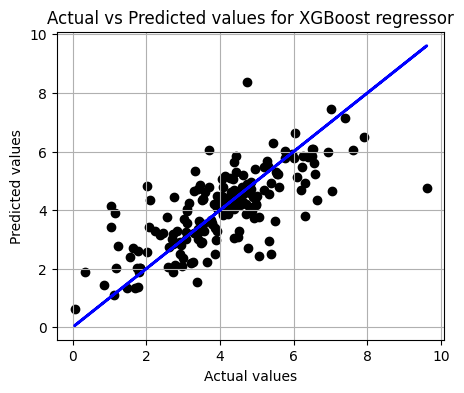

In [895]:
# Plot for Actual vs Predicted values 
plt.figure(figsize=(5,4))
plt.scatter(y_test, xgb_y_test_pred, color='black')
plt.plot(y_test, y_test, color='blue', linewidth = 2)
plt.title ('Actual vs Predicted values for XGBoost regressor')
plt.xlabel('Actual values') 
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

# Model6: Multiple Linear Regression

In [896]:
# Multiple Linear Regressor
mlr_pipeline = Pipeline([
    ('mlr', LinearRegression())
])

In [897]:
# Perform cross-validation
mlr_cv_scores = cross_val_score(mlr_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive RMSE scores
mlr_cv_rmse_scores = np.sqrt(-mlr_cv_scores)

# Calculate the mean and standard deviation of the RMSE scores
mlr_mean_cv_rmse = np.mean(mlr_cv_rmse_scores)
mlr_std_cv_rmse = np.std(mlr_cv_rmse_scores)

# Print the cross-validation results
print("Cross-validation RMSE scores:", mlr_cv_rmse_scores)
print("Mean RMSE:", mlr_mean_cv_rmse)
print("Standard deviation of RMSE:", mlr_std_cv_rmse)

Cross-validation RMSE scores: [0.83351773 1.10157451 0.90224047 0.92276911 0.92648086]
Mean RMSE: 0.9373165358455798
Standard deviation of RMSE: 0.08867270803510044


In [898]:
# Fit the Multiple Linear Regression model
mlr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('mlr', LinearRegression())])

In [899]:
# Evaluate MLR model
mlr_y_train_pred = mlr_pipeline.predict(X_train)
mlr_y_test_pred = mlr_pipeline.predict(X_test)

In [900]:
# Calculate metrics
mlr_mae_train = mean_absolute_error(y_train, mlr_y_train_pred)
mlr_mse_train = mean_squared_error(y_train, mlr_y_train_pred)
mlr_rmse_train = np.sqrt(mlr_mse_train)
mlr_r2_train = r2_score(y_train, mlr_y_train_pred)

mlr_mae_test = mean_absolute_error(y_test, mlr_y_test_pred)
mlr_mse_test = mean_squared_error(y_test, mlr_y_test_pred)
mlr_rmse_test = np.sqrt(mlr_mse_test)
mlr_r2_test = r2_score(y_test, mlr_y_test_pred)

In [901]:
# Print MLR metrics
print("Multiple Linear Regression Training set metrics:")
print(f"MAE: {mlr_mae_train}")
print(f"MSE: {mlr_mse_train}")
print(f"RMSE: {mlr_rmse_train}")
print(f"R squared: {mlr_r2_train}")

Multiple Linear Regression Training set metrics:
MAE: 0.6757904291152954
MSE: 0.8574180006980896
RMSE: 0.9259687066078186
R squared: 0.5798659933898185


In [902]:
print("Multiple Linear Regression Test set metrics:")
print(f"MAE: {mlr_mae_test}")
print(f"MSE: {mlr_mse_test}")
print(f"RMSE: {mlr_rmse_test}")
print(f"R squared: {mlr_r2_test}")

Multiple Linear Regression Test set metrics:
MAE: 0.7396159768104553
MSE: 1.0539551973342896
RMSE: 1.026623249053955
R squared: 0.5643869864511825


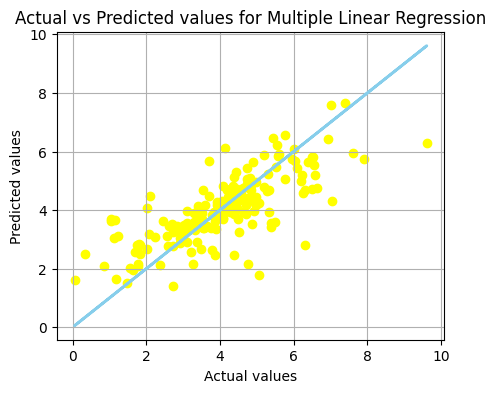

In [903]:
# Plot for Actual vs Predicted values 
plt.figure(figsize=(5,4))
plt.scatter(y_test, mlr_y_test_pred, color='yellow')
plt.plot(y_test, y_test, color='skyblue', linewidth = 2)
plt.title ('Actual vs Predicted values for Multiple Linear Regression')
plt.xlabel('Actual values') 
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

# Model7:Neural Network

In [904]:
# Neural Network for Regression Pipeline
nn_pipeline = Pipeline([
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500))
])

In [905]:
# Perform cross-validation
nn_cv_scores = cross_val_score(nn_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
nn_cv_rmse_scores = np.sqrt(-nn_cv_scores)

# Print cross-validation results
print("Cross-validation RMSE scores:", nn_cv_rmse_scores)
print("Mean RMSE:", np.mean(nn_cv_rmse_scores))
print("Standard deviation of RMSE:", np.std(nn_cv_rmse_scores))

Cross-validation RMSE scores: [1.06861208 1.08313973 0.85520649 0.94766161 0.98275023]
Mean RMSE: 0.9874740270696467
Standard deviation of RMSE: 0.08347137683940209


In [906]:
# Fit the neural network model
nn_pipeline.fit(X_train, y_train)

# Predict on the training set
nn_y_train_pred = nn_pipeline.predict(X_train)

# Predict on the test set
nn_y_test_pred = nn_pipeline.predict(X_test)

In [907]:
# Calculate training set metrics
nn_mae_train = mean_absolute_error(y_train, nn_y_train_pred)
nn_mse_train = mean_squared_error(y_train, nn_y_train_pred)
nn_rmse_train = np.sqrt(nn_mse_train)
nn_r2_train = r2_score(y_train, nn_y_train_pred)

# Calculate test set metrics
nn_mae_test = mean_absolute_error(y_test, nn_y_test_pred)
nn_mse_test = mean_squared_error(y_test, nn_y_test_pred)
nn_rmse_test = np.sqrt(nn_mse_test)
nn_r2_test = r2_score(y_test, nn_y_test_pred)

In [908]:
# Print training set metrics
print("Neural Network Training set metrics:")
print(f"MAE: {nn_mae_train}")
print(f"MSE: {nn_mse_train}")
print(f"RMSE: {nn_rmse_train}")
print(f"R squared: {nn_r2_train}")


Neural Network Training set metrics:
MAE: 0.5140911936759949
MSE: 0.501814067363739
RMSE: 0.7083883881568909
R squared: 0.7541115996745313


In [909]:
# Print test set metrics
print("Neural Network Test set metrics:")
print(f"MAE: {nn_mae_test}")
print(f"MSE: {nn_mse_test}")
print(f"RMSE: {nn_rmse_test}")
print(f"R squared: {nn_r2_test}")

Neural Network Test set metrics:
MAE: 0.6883829236030579
MSE: 0.9597069025039673
RMSE: 0.9796463251113892
R squared: 0.6033410153506681


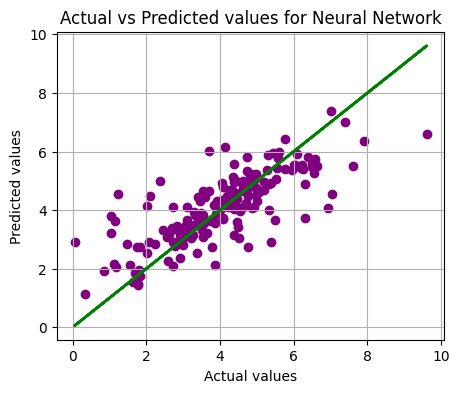

In [910]:
# Plot for Actual vs Predicted values 
plt.figure(figsize=(5,4))
plt.scatter(y_test, nn_y_test_pred, color='purple')
plt.plot(y_test, y_test, color='green', linewidth = 2)
plt.title ('Actual vs Predicted values for Neural Network')
plt.xlabel('Actual values') 
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

# Model8: Ridge Regression

In [911]:
# Ridge Regression
ridge_pipeline = Pipeline([
    ('ridge', Ridge())
])

# Perform cross-validation
ridge_cv_scores = cross_val_score(ridge_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_cv_rmse_scores = np.sqrt(-ridge_cv_scores)

# Print cross-validation results
print("Ridge Regression Cross-validation RMSE scores:", ridge_cv_rmse_scores)
print("Mean RMSE:", np.mean(ridge_cv_rmse_scores))
print("Standard deviation of RMSE:", np.std(ridge_cv_rmse_scores))

Ridge Regression Cross-validation RMSE scores: [0.83343935 1.10147717 0.90298693 0.92144516 0.92652078]
Mean RMSE: 0.9371738783838659
Standard deviation of RMSE: 0.08864090656724809


In [912]:
# Fit the Ridge model
ridge_pipeline.fit(X_train, y_train)

# Evaluate Ridge model
ridge_y_train_pred = ridge_pipeline.predict(X_train)
ridge_y_test_pred = ridge_pipeline.predict(X_test)

In [913]:
# Calculate metrics
ridge_mae_train = mean_absolute_error(y_train, ridge_y_train_pred)
ridge_mse_train = mean_squared_error(y_train, ridge_y_train_pred)
ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_r2_train = r2_score(y_train, ridge_y_train_pred)

ridge_mae_test = mean_absolute_error(y_test, ridge_y_test_pred)
ridge_mse_test = mean_squared_error(y_test, ridge_y_test_pred)
ridge_rmse_test = np.sqrt(ridge_mse_test)
ridge_r2_test = r2_score(y_test, ridge_y_test_pred)

In [914]:
# Print Ridge metrics
print("Ridge Training set metrics:")
print(f"MAE: {ridge_mae_train}")
print(f"MSE: {ridge_mse_train}")
print(f"RMSE: {ridge_rmse_train}")
print(f"R squared: {ridge_r2_train}")

Ridge Training set metrics:
MAE: 0.6758943796157837
MSE: 0.8574624061584473
RMSE: 0.9259926676750183
R squared: 0.5798443069141488


In [915]:
print("Ridge Test set metrics:")
print(f"MAE: {ridge_mae_test}")
print(f"MSE: {ridge_mse_test}")
print(f"RMSE: {ridge_rmse_test}")
print(f"R squared: {ridge_r2_test}")

Ridge Test set metrics:
MAE: 0.7394670844078064
MSE: 1.0534394979476929
RMSE: 1.026371955871582
R squared: 0.5646001391340978


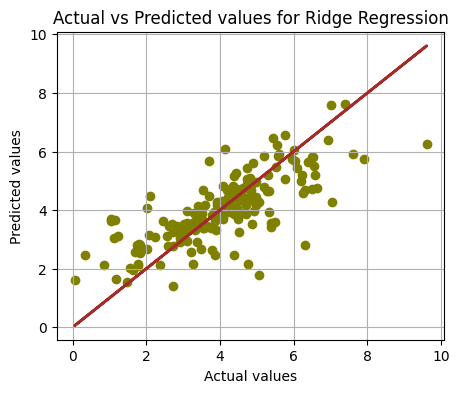

In [916]:
# Plot for Actual vs Predicted values 
plt.figure(figsize=(5,4))
plt.scatter(y_test, ridge_y_test_pred, color= 'olive')
plt.plot(y_test, y_test, color='brown', linewidth = 2)
plt.title ('Actual vs Predicted values for Ridge Regression')
plt.xlabel('Actual values') 
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

# Plot to show Root Mean Square Error (RMSE) of Each Model

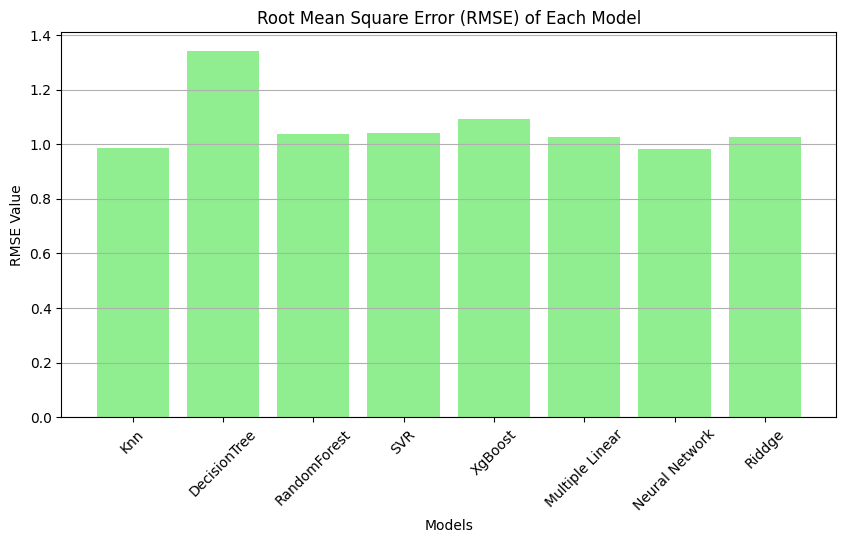

In [917]:
# Model names
model_names = ['Knn', 'DecisionTree', 'RandomForest', 'SVR', 'XgBoost','Multiple Linear', 'Neural Network','Riddge']  

# RMSE values for each model
rmse_values = [0.987, 1.343, 1.039, 1.042, 1.091, 1.026, 0.982,1.026]  

# Plot RMSE values
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_values, color='lightgreen')
plt.title('Root Mean Square Error (RMSE) of Each Model')
plt.xlabel('Models')
plt.ylabel('RMSE Value')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()

# Plot to show R-squared Values of Each Model

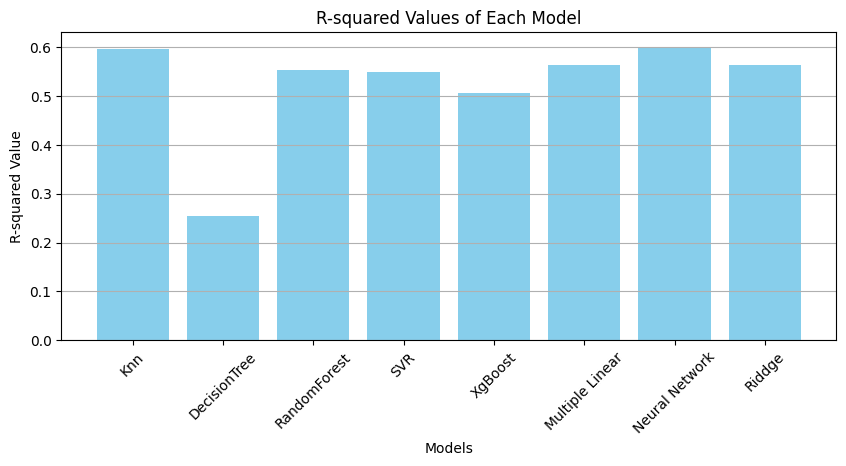

In [918]:
# Model names
model_names = ['Knn', 'DecisionTree', 'RandomForest', 'SVR', 'XgBoost','Multiple Linear', 'Neural Network', 'Riddge'] 

# R-squared values for each model
r_squared_values = [0.597, 0.254, 0.553, 0.550, 0.507, 0.564, 0.601, 0.564] 

# Plot R-squared values
plt.figure(figsize=(10, 4))
plt.bar(model_names, r_squared_values, color='skyblue')
plt.title('R-squared Values of Each Model')
plt.xlabel('Models')
plt.ylabel('R-squared Value')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()


# Models Report

In [919]:
# Model names
model_names = ['Knn', 'DecisionTree', 'RandomForest', 'SVR', 'XgBoost','Multiple Linear', 'Neural Network', 'Ridge'] 

rmse_train = [0.744, 0.133, 0.800, 0.933, 0.143,  0.925,  0.982, 0.925]  
rmse_test = [0.987, 1.343, 1.039, 1.042, 1.091, 1.026, 0.982, 1.026] 
r2_train = [0.728, 0.991, 0.686, 0.572,  0.989,  0.579, 0.601, 0.579]  
r2_test = [0.597, 0.254, 0.553, 0.550, 0.507, 0.564, 0.601, 0.564] 

# Create a DataFrame
model_performance_df = pd.DataFrame({
    'Model': model_names,
    'RMSE (Training)': rmse_train,
    'RMSE (Test)': rmse_test,
    'R2 (Training)': r2_train,
    'R2 (Test)': r2_test
})

# Display the DataFrame
print(model_performance_df)


             Model  RMSE (Training)  RMSE (Test)  R2 (Training)  R2 (Test)
0              Knn            0.744        0.987          0.728      0.597
1     DecisionTree            0.133        1.343          0.991      0.254
2     RandomForest            0.800        1.039          0.686      0.553
3              SVR            0.933        1.042          0.572      0.550
4          XgBoost            0.143        1.091          0.989      0.507
5  Multiple Linear            0.925        1.026          0.579      0.564
6   Neural Network            0.982        0.982          0.601      0.601
7            Ridge            0.925        1.026          0.579      0.564


Our best four models are:

1.Decision Tree: It has the lowest test RMSE of 1.343 and the highest test R2 score of 0.254.

2.XGBoost: It has a relatively low test RMSE of 1.091 and a high test R2 score of 0.507.

3.Multiple Linear Regression: It has a test RMSE of 1.026 and a test R2 score of 0.564.

4.Ridge Regression:  It has the same test RMSE and R2 score as Multiple Linear Regression, so it's also among the top models.

# Clssification Models

# Kmeans Clustering

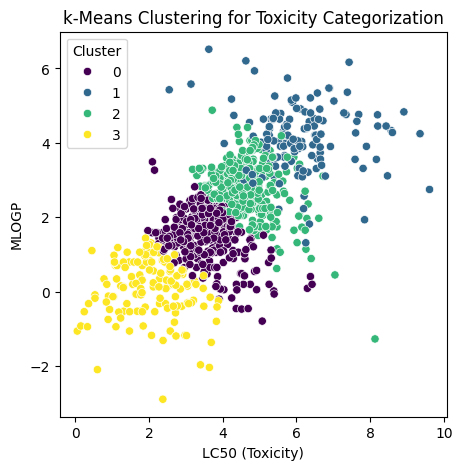

In [920]:
# Select features for clustering
X_cluster = df[['MLOGP', 'CIC0', 'GATS1i', 'NdssC', 'NdsCH', 'SM1_Dz(Z)', 'LC50']]

# Define the number of clusters
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model 
kmeans.fit(X_cluster)

# Predict the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(5, 5))
sns.scatterplot(x='LC50', y='MLOGP', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('k-Means Clustering for Toxicity Categorization')
plt.xlabel('LC50 (Toxicity)')
plt.ylabel('MLOGP')
plt.legend(title='Cluster')
plt.show()


The k-means strategy divided the chemicals into four categories consisting of high toxicity, moderate 
toxicity,low toxicity, and very low toxicity accounting for 96 h LC50 values for fish toxicity .

0: Very Low Toxicity
1: Low Toxicity
2: Moderately Toxicity
3: High Toxicity

In [921]:
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50,Cluster
0,3.260,0.829,1.676,0.0,1.0,1.453,3.770,0
1,2.189,0.580,0.863,0.0,0.0,1.348,3.115,0
2,2.125,0.638,0.831,0.0,0.0,1.348,3.531,0
3,3.027,0.331,1.472,1.0,0.0,1.807,3.510,0
4,2.094,0.827,0.860,0.0,0.0,1.886,5.390,2


In [922]:
for column in df.columns:
    if df[column].dtype == ('float32','int32'):
        df[column] = df[column].astype('object')

In [923]:
# Specify the categories for the 'Cluster' column
categories = [0, 1, 2, 3]  

# Convert the 'Cluster' column to a categorical data type
df['Cluster'] = pd.Categorical(df['Cluster'], categories=categories)


In [924]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CIC0       908 non-null    object  
 1   SM1_Dz(Z)  908 non-null    object  
 2   GATS1i     908 non-null    object  
 3   NdsCH      908 non-null    object  
 4   NdssC      908 non-null    object  
 5   MLOGP      908 non-null    object  
 6   LC50       908 non-null    object  
 7   Cluster    908 non-null    category
dtypes: category(1), object(7)
memory usage: 50.9+ KB


In [925]:
X=df.iloc[:,:-1].values
y=df.iloc[:,7].values

In [926]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Mode1:RandomForest Classifier

In [928]:
# RandomForest Classifier
rfc_pipeline = Pipeline([
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Model Training
rfc_pipeline.fit(X_train, y_train)

# Make predictions
rfc_predicted = rfc_pipeline.predict(X_test)

# Get the true categories from the test set
true_categories = y_test  

# Calculate accuracy
accuracy_rfc = accuracy_score(y_test, rfc_predicted)
print("Random Forest Accuracy:", accuracy_rfc)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, rfc_predicted))

# Confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rfc_predicted))



Random Forest Accuracy: 0.945054945054945
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        60
           1       0.96      0.93      0.95        29
           2       0.94      0.94      0.94        62
           3       0.94      1.00      0.97        31

    accuracy                           0.95       182
   macro avg       0.95      0.95      0.95       182
weighted avg       0.95      0.95      0.94       182

Random Forest Confusion Matrix:
[[56  0  2  2]
 [ 0 27  2  0]
 [ 3  1 58  0]
 [ 0  0  0 31]]


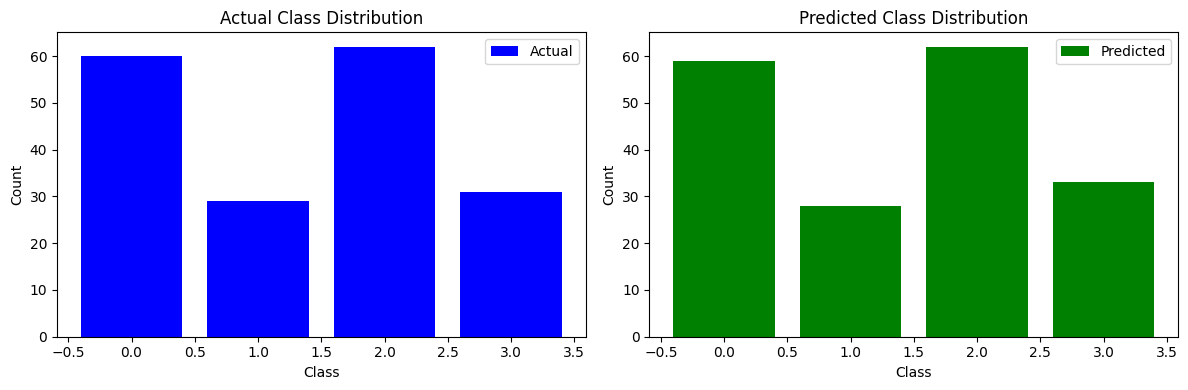

In [929]:
# Function to plot Class Prediction Distribution
def plot_class_distribution(true_categories, rfc_predicted):
    unique_classes = np.unique(true_categories)
    true_counts = [np.sum(true_categories == cls) for cls in unique_classes]
    rfc_predicted_counts = [np.sum(rfc_predicted == cls) for cls in unique_classes]

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot actual class distribution
    ax[0].bar(unique_classes,true_counts, color='blue', label='Actual')
    ax[0].set_title('Actual Class Distribution')
    ax[0].set_xlabel('Class')
    ax[0].set_ylabel('Count')
    ax[0].legend()
    
    # Plot predicted class distribution
    ax[1].bar(unique_classes, rfc_predicted_counts, color='green', label='Predicted')
    ax[1].set_title('Predicted Class Distribution')
    ax[1].set_xlabel('Class')
    ax[1].set_ylabel('Count')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Plot Class Prediction Distribution
plot_class_distribution(true_categories, rfc_predicted)


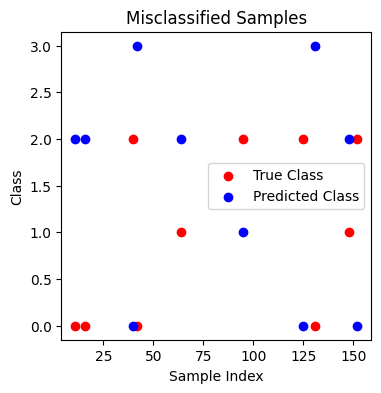

In [930]:
# Function to plot Misclassified Samples
def plot_misclassified_samples(true_categories, rfc_predicted):
    rfc_misclassified_indices = np.where(true_categories != rfc_predicted)[0]
    rfc_misclassified_true = true_categories[rfc_misclassified_indices]
    rfc_misclassified_predicted = rfc_predicted[rfc_misclassified_indices]

    plt.figure(figsize=(4, 4))
    plt.scatter(rfc_misclassified_indices, rfc_misclassified_true, color='red', label='True Class')
    plt.scatter(rfc_misclassified_indices, rfc_misclassified_predicted, color='blue', label='Predicted Class')
    plt.title('Misclassified Samples')
    plt.xlabel('Sample Index')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

# Plot Misclassified Samples
plot_misclassified_samples(true_categories, rfc_predicted)

# Mode2:Decision Tree Classifier

In [934]:
# Decision Tree Classifier
dtc_pipeline = Pipeline([
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

# Model Training
dtc_pipeline.fit(X_train, y_train)

# Make predictions
dtc_predicted = dtc_pipeline.predict(X_test)

# Get the true categories from the test set
true_categories = y_test  

# Calculate accuracy
accuracy_dtc = accuracy_score(y_test, dtc_predicted)
print("Decision Tree Accuracy:", accuracy_dtc)

# Classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, dtc_predicted))

# Confusion matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dtc_predicted))


Decision Tree Accuracy: 0.8901098901098901
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        60
           1       0.86      0.86      0.86        29
           2       0.92      0.87      0.89        62
           3       0.82      1.00      0.90        31

    accuracy                           0.89       182
   macro avg       0.88      0.90      0.89       182
weighted avg       0.89      0.89      0.89       182

Decision Tree Confusion Matrix:
[[52  0  1  7]
 [ 0 25  4  0]
 [ 4  4 54  0]
 [ 0  0  0 31]]


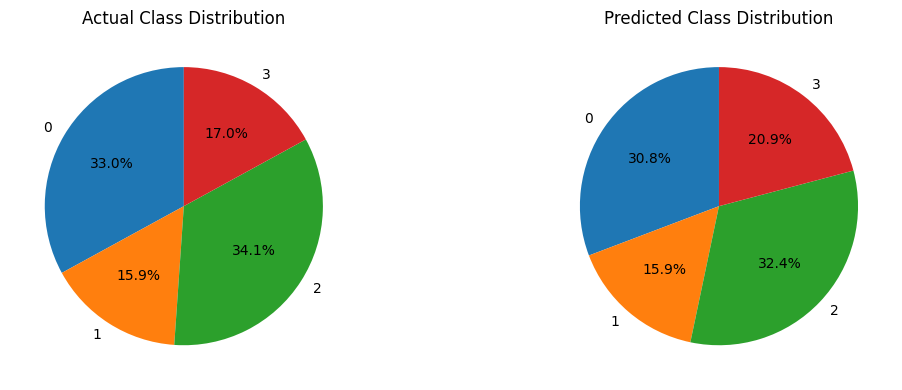

In [935]:
# Function to plot Class Prediction Distribution
def plot_class_distribution(true_categories, dtc_predicted):
    unique_classes = np.unique(true_categories)
    true_counts = [np.sum(true_categories == cls) for cls in unique_classes]
    dtc_predicted_counts = [np.sum(dtc_predicted == cls) for cls in unique_classes]

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot actual class distribution pie chart
    ax[0].pie(true_counts, labels=unique_classes, autopct='%1.1f%%', startangle=90)
    ax[0].set_title('Actual Class Distribution')
    
    # Plot predicted class distribution pie chart
    ax[1].pie(dtc_predicted_counts, labels=unique_classes, autopct='%1.1f%%', startangle=90)
    ax[1].set_title('Predicted Class Distribution')

    plt.tight_layout()
    plt.show()

# Plot Class Prediction Distribution using pie charts
plot_class_distribution(true_categories, dtc_predicted)


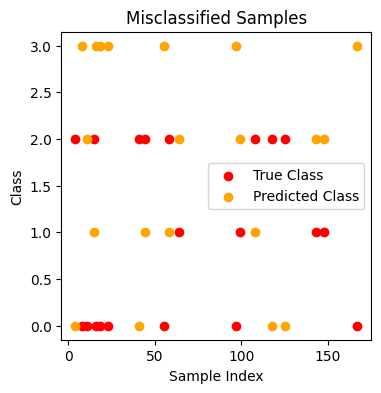

In [936]:
# Function to plot Misclassified Samples
def plot_misclassified_samples(true_categories, dtc_predicted):
    dtc_misclassified_indices = np.where(true_categories != dtc_predicted)[0]
    dtc_misclassified_true = true_categories[dtc_misclassified_indices]
    dtc_misclassified_predicted = dtc_predicted[dtc_misclassified_indices]

    plt.figure(figsize=(4, 4))
    plt.scatter(dtc_misclassified_indices, dtc_misclassified_true, color='red', label='True Class')
    plt.scatter(dtc_misclassified_indices, dtc_misclassified_predicted, color='orange', label='Predicted Class')
    plt.title('Misclassified Samples')
    plt.xlabel('Sample Index')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

# Plot Misclassified Samples
plot_misclassified_samples(true_categories, dtc_predicted)

# Model3: XGBoost Classifier

In [937]:
# XGBoost Classifier
xgbc_pipeline = Pipeline([
    ('xgboost', XGBClassifier(random_state=42))
])
# Fit the pipeline
xgbc_pipeline.fit(X_train, y_train)

# Make predictions
xgbc_predicted = xgbc_pipeline.predict(X_test)


# Get the true categories from the test set
true_categories = y_test  

# Calculate accuracy
accuracy_xgbc = accuracy_score(y_test, xgbc_predicted )
print("XGBoost Accuracy:", accuracy_xgbc)

# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, xgbc_predicted ))

# Confusion matrix
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgbc_predicted ))

XGBoost Accuracy: 0.9615384615384616
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.90      0.97      0.93        29
           2       0.95      0.94      0.94        62
           3       1.00      1.00      1.00        31

    accuracy                           0.96       182
   macro avg       0.96      0.97      0.96       182
weighted avg       0.96      0.96      0.96       182

XGBoost Confusion Matrix:
[[58  0  2  0]
 [ 0 28  1  0]
 [ 1  3 58  0]
 [ 0  0  0 31]]


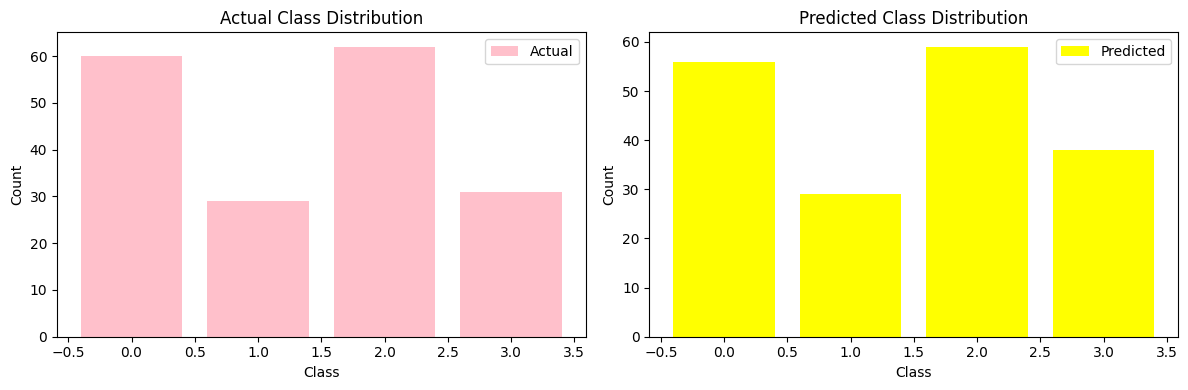

In [938]:
# Function to plot Class Prediction Distribution
def plot_class_distribution(true_categories, xgbc_predicted):
    unique_classes = np.unique(true_categories)
    true_counts = [np.sum(true_categories == cls) for cls in unique_classes]
    xgbc_predicted_counts = [np.sum(xgbc_predicted_categories == cls) for cls in unique_classes]

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot actual class distribution
    ax[0].bar(unique_classes, true_counts, color='pink', label='Actual')
    ax[0].set_title('Actual Class Distribution')
    ax[0].set_xlabel('Class')
    ax[0].set_ylabel('Count')
    ax[0].legend()
    
    # Plot predicted class distribution
    ax[1].bar(unique_classes, xgbc_predicted_counts, color='yellow', label='Predicted')
    ax[1].set_title('Predicted Class Distribution')
    ax[1].set_xlabel('Class')
    ax[1].set_ylabel('Count')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Plot Class Prediction Distribution
plot_class_distribution(true_categories, xgbc_predicted)

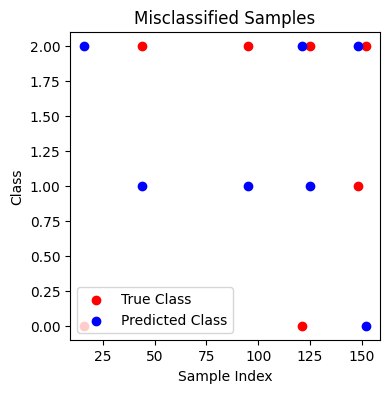

In [939]:
# Function to plot Misclassified Samples
def plot_misclassified_samples(true_categories, xgbc_predicted):
    xgbc_misclassified_indices = np.where(true_categories != xgbc_predicted)[0]
    xgbc_misclassified_true = true_categories[xgbc_misclassified_indices]
    xgbc_misclassified_predicted = xgbc_predicted[xgbc_misclassified_indices]

    plt.figure(figsize=(4, 4))
    plt.scatter(xgbc_misclassified_indices, xgbc_misclassified_true, color='red', label='True Class')
    plt.scatter(xgbc_misclassified_indices, xgbc_misclassified_predicted, color='blue', label='Predicted Class')
    plt.title('Misclassified Samples')
    plt.xlabel('Sample Index')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

# Plot Misclassified Samples
plot_misclassified_samples(true_categories, xgbc_predicted)